# We are going to tweet like Donald Trump.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import pkg_resources
from string import punctuation
import csv
import re
import gc

from fastai import *
from fastai.text import *

from cleanup import *
import tweepy

In [3]:
pkg_resources.get_distribution("fastai").version

'1.0.37'

In [4]:
PATH = Path('.')
!ls {PATH}

all_orig.csv	     condensed_2011.json  condensed_2017.json  models
all_tweets.csv	     condensed_2012.json  condensed_2018.json  __pycache__
auth.ipynb	     condensed_2013.json  config	       todo
cleanup.py	     condensed_2014.json  early.csv	       trump.ipynb
condensed_2009.json  condensed_2015.json  late.csv	       trump_lm
condensed_2010.json  condensed_2016.json  late_orig.csv


In [83]:
tweets2009 = pd.read_json('condensed_2009.json')
tweets2010 = pd.read_json('condensed_2010.json')
tweets2011 = pd.read_json('condensed_2011.json')
tweets2012 = pd.read_json('condensed_2012.json')
tweets2013 = pd.read_json('condensed_2013.json')
tweets2014 = pd.read_json('condensed_2014.json')
tweets2015 = pd.read_json('condensed_2015.json')
tweets2016 = pd.read_json('condensed_2016.json')
tweets2017 = pd.read_json('condensed_2017.json')
tweets2018 = pd.read_json('condensed_2018.json')

In [84]:
tweetlist = [tweets2009, tweets2010, tweets2011, tweets2012, tweets2013, tweets2014, tweets2015, tweets2016, tweets2017, tweets2018]
all_tweets = pd.concat(tweetlist)

In [88]:
all_tweets.to_csv('all_tweets.csv')

In [95]:
tweets_df = pd.read_csv('all_tweets.csv')

# I guess we're about ready to go!

In [5]:
bs = 48
np.random.seed(42)

In [6]:
trump_lm = (TextList.from_csv(PATH, 'all_tweets.csv', cols='text')
            .random_split_by_pct(0.1)
            .label_for_lm()
            .databunch(bs=bs))

In [98]:
trump_lm.save('trump_lm')

In [6]:
trump_lm = TextLMDataBunch.load(PATH, 'trump_lm', bs=bs)

In [99]:
trump_lm.show_batch()

idx,text
0,"xxbos and here 's another xxrep 4 . http : / / www.trump.com / golf_clubs / xxunk / xxunk xxbos xxmaj our thoughts and prayers are with the victims of the horrible attack in xxmaj france yesterday , and we grieve the nation ’s loss . xxmaj we also condemn the violent actions of the xxunk and anyone who would provide him support . xxmaj we are with you @emmanuelmacron"
1,"amazing and accomplished . xxmaj competition is very tough . xxup enjoy xxup the xxup show ! xxbos "" xxunk : @realdonaldtrump is literally the xxunk of amazing ! xxmaj got ta love him ❤ ️ "" xxmaj thank you xxmaj xxunk . xxbos "" xxunk : xxmaj oh , xxmaj donald . xxmaj do n't ever change @realdonaldtrump "" i will try not to ! xxbos a letter to"
2,"xxup again ! xxbos xxup rt @greta : xxmaj thank you @realdonaldtrump - this is important to so many of us xxunk xxbos "" xxunk : xxmaj the problem is @mittromney was a weak establishment candidate who could n't even turn out the base . xxmaj weak at best ! "" xxbos xxmaj thank you xxmaj south xxmaj carolina ! # xxmaj trump2016 xxunk xxbos xxmaj must read xxunk article"
3,"news xxbos xxmaj today in xxmaj florida , i pledged to stand with the people of xxmaj cuba and xxmaj venezuela in their fight against xxunk cont : xxunk xxbos xxmaj sleazy xxmaj adam xxmaj schiff , the totally biased xxmaj congressman looking into "" xxmaj russia , "" spends all of his time on television pushing the xxmaj dem loss excuse ! xxbos xxmaj bob xxmaj xxunk , successful"
4,"@gillibean8514 @brandiglanville @apprenticenbc @nbc @kenyamoore @geraldorivera ca n't wait till apprentice ! ! ! "" xxbos “ xxmaj the most xxunk words in the xxmaj xxunk language are : i 'm from the government and i 'm here to help . ” – xxmaj pres . xxmaj ronald xxmaj reagan xxbos xxmaj what the hell is going on with xxup global xxup warming . xxmaj the planet is freezing ,"


In [100]:
trump_lm.vocab.itos[:15]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.',
 'the',
 '"',
 '!',
 ',',
 'to',
 ':']

In [101]:
trump_lm.vocab.itos[15:46]

['a',
 'and',
 'is',
 'of',
 'you',
 'in',
 'i',
 '@realdonaldtrump',
 'for',
 '#',
 '&',
 'on',
 'be',
 'it',
 'great',
 'will',
 'trump',
 '-',
 'that',
 'are',
 'with',
 'we',
 "'s",
 'have',
 'he',
 'at',
 'our',
 '?',
 'my',
 'do',
 'not']

In [7]:
learn = language_model_learner(trump_lm, pretrained_model=URLs.WT103_1, drop_mult=0.3)

In [103]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


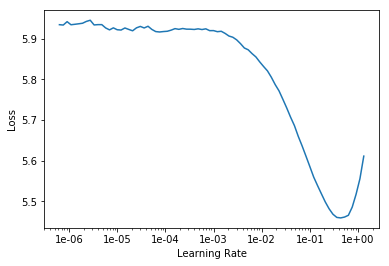

In [105]:
learn.recorder.plot(skip_end=10)

In [108]:
learn.fit_one_cycle(5, 1e-1, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy
1,4.028556,4.128389,0.274065
2,4.509371,4.298726,0.260453
3,4.336484,4.138552,0.275697
4,4.021148,3.938454,0.294253
5,3.802360,3.878778,0.298508


In [107]:
learn.save('trump1') #3.715136 	3.839334 	0.303426 after 7

In [109]:
learn.load('trump1')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (32677 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: LMTextList (32677 items)
[Text xxbos xxmaj from xxmaj donald xxmaj trump : xxmaj wishing everyone a wonderful holiday & a happy , healthy , prosperous xxmaj new xxmaj year . xxmaj let ’s think like champions in 2010 !, Text xxbos xxmaj trump xxmaj international xxmaj tower in xxmaj chicago ranked 6th tallest building in world by xxmaj council on xxmaj tall xxmaj buildings & xxmaj urban xxmaj xxunk http : / / bit.ly / xxunk, Text xxbos xxmaj wishing you and yours a very xxmaj happy and xxmaj xxunk xxmaj thanksgiving !, Text xxbos xxmaj donald xxmaj trump xxmaj partners with xxup xxunk on xxmaj new xxmaj reality xxmaj series xxmaj entitled , xxmaj omarosa 's xxmaj ultimate xxmaj merger : http : / / tinyurl.com / xxunk, Text xxbos xxunk xxmaj donald xxmaj trump : " xxmaj ivanka and xxmaj jared ’s wedding was spectacular , and they make

In [110]:
learn.freeze_to(-1)

In [117]:
learn.fit_one_cycle(10, 5e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy
1,3.263876,3.691080,0.321687
2,3.514779,3.803223,0.306504
3,3.782820,3.901663,0.297286
4,3.814824,3.905827,0.296930
5,3.768949,3.858483,0.303435
6,3.684427,3.817730,0.306278
7,3.529825,3.747123,0.314355
8,3.379947,3.693683,0.320035
9,3.236048,3.669329,0.323513
10,3.172949,3.665438,0.323919


In [118]:
learn.save('trump1_1') #3.172949 	3.665438 	0.323919 after 15, 5, 10, 10

In [119]:
learn.freeze_to(-2)

In [124]:
learn.fit_one_cycle(10, 5e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy
1,2.871841,3.512023,0.348130
2,3.152897,3.581222,0.338656
3,3.447248,3.667427,0.328127
4,3.502734,3.674323,0.325977
5,3.447399,3.633647,0.332666
6,3.340912,3.588745,0.338113
7,3.177438,3.537698,0.344850
8,2.993360,3.501362,0.351798
9,2.842362,3.499692,0.354593
10,2.748612,3.507438,0.354645


In [125]:
learn.save('trump_2')# 2.748612 	3.507438 	0.354645 after 10, 10, 10

In [126]:
learn.unfreeze()

In [127]:
learn.fit_one_cycle(15, slice(1e-2/(2.6**4), 1e-2), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy
1,2.728987,3.509395,0.354910
2,2.727344,3.502838,0.355062
3,2.734565,3.502741,0.354572
4,2.719242,3.503315,0.355892
5,2.688015,3.503466,0.356102
6,2.629315,3.506119,0.355544
7,2.577199,3.516062,0.356700
8,2.511580,3.516236,0.357195
9,2.462497,3.526510,0.357597
10,2.412727,3.534224,0.357898


In [128]:
learn.save('trump_all') #2.248759 	3.561442 	0.358221 after one set of 10

In [129]:
learn.freeze()

In [22]:
learn.load('trump_all')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (32677 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: LMTextList (32677 items)
[Text xxbos xxmaj from xxmaj donald xxmaj trump : xxmaj wishing everyone a wonderful holiday & a happy , healthy , prosperous xxmaj new xxmaj year . xxmaj let ’s think like champions in 2010 !, Text xxbos xxmaj trump xxmaj international xxmaj tower in xxmaj chicago ranked 6th tallest building in world by xxmaj council on xxmaj tall xxmaj buildings & xxmaj urban xxmaj xxunk http : / / bit.ly / xxunk, Text xxbos xxmaj wishing you and yours a very xxmaj happy and xxmaj xxunk xxmaj thanksgiving !, Text xxbos xxmaj donald xxmaj trump xxmaj partners with xxup xxunk on xxmaj new xxmaj reality xxmaj series xxmaj entitled , xxmaj omarosa 's xxmaj ultimate xxmaj merger : http : / / tinyurl.com / xxunk, Text xxbos xxunk xxmaj donald xxmaj trump : " xxmaj ivanka and xxmaj jared ’s wedding was spectacular , and they make

# Making some functions to deal with text

In [9]:
def rawPredict(starter='xxbos', length=100):
    """
    starter is a string that beings the tweet
    length is the number of words
    """
    return "".join(learn.predict(starter, length, temperature=1.1))

In [122]:
#mystring = rawPredict()
mystring

'xxbos xxmaj sorry 100 % of their thugs just killed the xxup u.s. xxmaj not hillary , nice ! xxmaj often not a nypd ! xxbos i am a certain developer but now again that ’s paid for by most believable that i feel both made money ( and others ) . xxup @cnn 97 % higher people showed that their crowd was through the roof ! xxbos xxmaj first woman speaker 2014 election . xxmaj our immigration officers must now be obsolete . xxmaj change talked about seniors / law and order . xxmaj let ’s make xxmaj univision great'

In [52]:
def cleanText(text, for_twitter=False):
    words = text.split()
    n = len(words)-1
    for i, word in enumerate(words):
        if word == 'xxbos':
            words[i] = ''
        elif word == 'xxmaj':
            if i < n:
                words[i+1] = words[i+1][0].upper() + words[i+1][1:]
            words[i] = ''
        elif word == 'xxup':
            if i < n:
                words[i+1] = words[i+1].upper()
            words[i] = ''
        elif word == 'xxunk' or word == '(' or word == ')' or word == '"':
            words[i] = ''
        elif word == 'xxrep':
            if i < n-1:
                if i == 0:
                    words[i] = words[i+2]*int(words[i+1])
                else:
                    words[i-1] += words[i+2]*int(words[i+1])
                    words[i] = ''
                words[i+1] = ''
                words[i+2] = ''               
            else:
                words[i] = ''
                if i < n:
                    words[i+1] = ''
        elif word == '.' or word == '!' or word == '?' or word == ';' or word == ',' or word == ':' or word == '%':
            if i > 0:
                j = i - 1
                while (j >= 0) & (words[j] == ''):
                    j -= 1
                words[j] += words[i]
                words[i] = ''
        elif word == '#':
            if i < n:
                words[i] += words[i+1]
                words[i+1] = ''
        elif word == "n't":
            if i > 1:
                words[i-1] += words[i]
                words[i] = ''
        elif len(word) > 1:
            if word[0] == "'":
                if i > 0:
                    words[i-1] += words[i]
                    words[i] = ''
        elif len(word) > 1:
             if (word[0] == '@') & (for_twitter==True):
                words[i] = '(@)' + word[1:]
    res = ' '.join(words).strip()
    res = re.sub(r"\s+", " ", res)
    return res
        

In [57]:
cleanText("xxrep 4 $")

'$$$$'

In [40]:
for i, word in enumerate("xxrep 5 !".split()):
    print(i, word)

0 xxrep
1 5
2 !


In [11]:
def trimText(text, n=0, for_twitter=False):
    pieces = re.split(r"[\.\!\?]", text)
    punc = re.findall(r"[\.\!\?]", text)
    weave = [pieces[i]+punc[i] for i in range(len(pieces)-(n+1))]
    res = "".join(weave)
    last = res.split()[-1].lower()
    if last == 'mr.' or last == 'mrs.':
        res = trimText(text, n+1)
    if (for_twitter==True) & (len(res)>280):
        res = trimText(text, n+1, for_twitter=True)
    return res

In [144]:
trimText(mystring2, 0, for_twitter=False)

'Sorry 100% of their thugs just killed the U.S. Not hillary, nice! Often not a nypd! i am a certain developer but now again that’s paid for by most believable that i feel both made money and others. 97% higher people showed that their crowd was through the roof! First woman speaker 2014 election. Our immigration officers must now be obsolete. Change talked about seniors / law and order.'

In [162]:
def generate_test_tweet():
    tweet = rawPredict()
    tweet = cleanText(tweet, for_twitter=True)
    tweet = trimText(tweet, n=0, for_twitter=True)
    print(tweet)

In [163]:
generate_test_tweet()

(@)howardkurtz: (@)GOP Trump faith in his (@)winpropp compared to his career, never saw it. #xxup cpac https: / / t.co / t If i double Stuart Stevens wouldn't win - she will do a terrible job broadcast RT (@)foxbusiness: .


In [20]:
def generate_tweet(starter='xxbos', publish=False, printing=False):
    tweet = rawPredict()
    tweet = cleanText(tweet, for_twitter=True)
    tweet = trimText(tweet, n=0, for_twitter=True)
    if printing:
        print(tweet)
    if publish:
        api.update_status(status=tweet)

In [21]:
generate_tweet(publish=True, printing=True)

(@)david360nc: We hate the American #@realdonaldtrump who knows if we can change America so we can call Hillary hands down (@)vincemcmahon (@)joycegoodman64 (@)kieranlalor: (@)realdonaldtrump if you pockets your 1st ahead of education, you will making millions as strong.


In [14]:
def generate_text(starter='xxbos', length=100):
    mytext = rawPredict(starter=starter, length=length)
    mytext = cleanText(mytext, for_twitter=False)
    mytext = trimText(mytext)
    return mytext

In [15]:
generate_text()

'Thank you. a great afternoon, just nominated, departing for the VOTE. Heading to now and mention your wise letter. Just announced, @bobbyjindal’s attack and so irrelevant: he gets the tax all pundits. Awesome news, NOT a VOICE! History has been horrible in still the fight against making the iphone screen grave — they know it and should be dealt -- only one owned dopes who ever deduct, fire and fraud!'

# Set things up for twitter and tweeting

In [16]:
exec(open("config").read())

In [17]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

In [18]:
print(api.me().name)

Deep Donald


In [133]:
api.update_status(status=mystring3)

Status(_api=<tweepy.api.API object at 0x7f52b5868eb8>, _json={'created_at': 'Thu Jan 17 00:44:47 +0000 2019', 'id': 1085699421055209473, 'id_str': '1085699421055209473', 'text': 'Sorry 100% of their thugs just killed the U.S. Not hillary, nice! Often not a nypd! Our immigration officers must n… https://t.co/aOIEoClESD', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/aOIEoClESD', 'expanded_url': 'https://twitter.com/i/web/status/1085699421055209473', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://github.com/tank671" rel="nofollow">DeepDonald</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1083465969945726976, 'id_str': '1083465969945726976', 'name': 'Deep Donald', 'screen_name': 'RNN_DonaldTrump', 'location': '', 'description': "I'm an 